In [2]:
from viscopy import ModelGenerator, generate_visc_model, generate_r_dist, plot_model, save_model, load_model
from viscopy import CORE_LM_BOUNDARY, LM_UM_BOUNDARY, LITH_VISC, EARTH_RADIUS

In [3]:
# initialise the model generator
# by default, we load PREM data from model.prem.l80.ump5.lm5
mg = ModelGenerator()

In [ ]:
# or we can load another model as the base for interpolation
mg = ModelGenerator.from_model(model_file="some/other/model")

In [ ]:
# or we can provide a custom PREM data df if required 
mg = ModelGenerator(model_df=some_model_df)

In [4]:
# viscosity model is defined in a dictionary per section as
# {viscosity: [lower_r_dist, upper_r_dist]}
# the generate_visc_model function makes this for us with default bounds
visc_model = generate_visc_model(
    visc_lm = 10**20, 
    visc_um = 10**23, 
    lith_thickness = 70 * 10**3
)

In [5]:
# defines the radius distance resolution
# each section has the pattern:
# [lower_r_dist, upper_r_dist], step
r_dist_model = [
    [(0, LM_UM_BOUNDARY), 35 * 1000],
    [(LM_UM_BOUNDARY, 6350000.0), 25 * 1000],
    [(6350000.0, EARTH_RADIUS), 10500],
]

r_dist = generate_r_dist(r_dist_model)

In [6]:
# now we can generate our model
# r_dist_new is optional, it will use a default r_dist array if not provided
# the model is returned in the form of a pandas dataframe
model = mg.generate(
    visc_model = visc_model,
    r_dist_new = r_dist
)

{'rad': <AxesSubplot: title={'center': 'rad'}>,
 'rhod': <AxesSubplot: title={'center': 'rhod'}>,
 'vel_p': <AxesSubplot: title={'center': 'vel_p'}>,
 'vel_s': <AxesSubplot: title={'center': 'vel_s'}>,
 'gacc': <AxesSubplot: title={'center': 'gacc'}>,
 'visc': <AxesSubplot: title={'center': 'visc'}>}

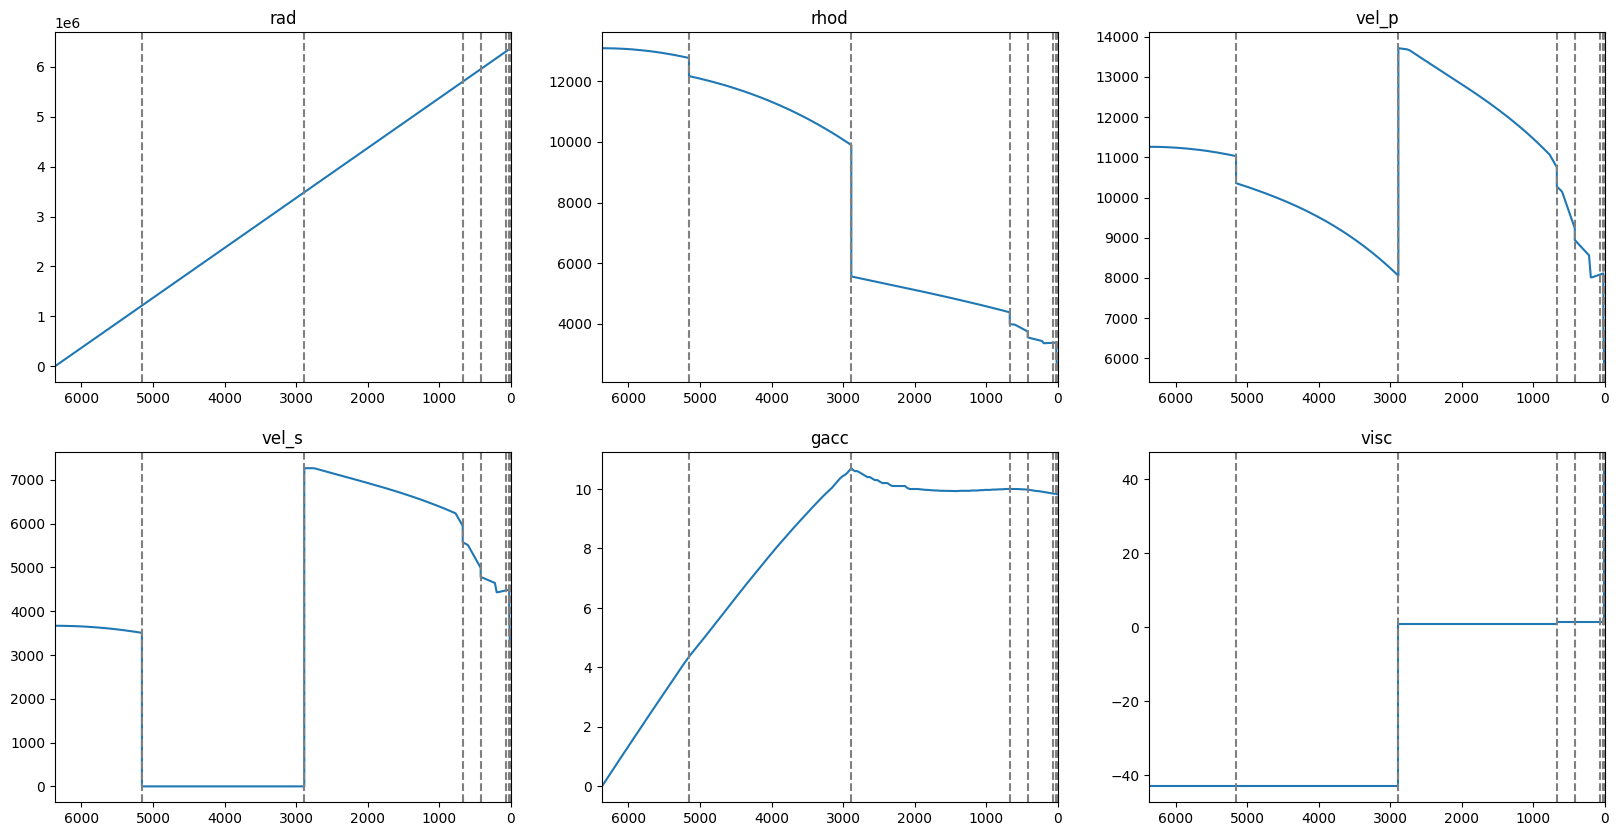

In [7]:
# we can now plot our new model
plot_model(model)

In [8]:
# we can save the model in the format used by sea-level model
save_model(model, save="new_model")

In [9]:
# and we can load sea-level model formatted models
load_model("new_model")

,rad,rhod,vel_p,vel_s,gacc,visc
0,0.0,13089.000,11262.000,3668.0000,0.000000,1.000000e-43
1,35000.0,13088.079,11262.000,3668.0000,0.128026,1.000000e-43
2,70000.0,13087.156,11261.156,3667.1557,0.255517,1.000000e-43
3,105000.0,13086.234,11260.234,3666.2342,0.383445,1.000000e-43
4,140000.0,13083.939,11259.313,3665.3132,0.510784,1.000000e-43
...,...,...,...,...,...,...
199,6350000.0,2900.000,6800.000,3900.0000,9.840000,2.000000e+01
200,6360500.0,2600.000,5800.000,3200.0000,9.830000,2.000000e+01
201,6361000.0,2600.000,5800.000,3200.0000,9.830000,2.000000e+01
202,6361000.0,2600.000,5800.000,3200.0000,9.820000,1.000000e+43
